# 순서
1. 데이터 로드
2. 데이터 탐색
3. 데이터 분석
4. 데이토 인사이트 정리

## 1.데이터 로드


In [2]:
import pandas as pd
import os

In [3]:
common_path = "/data/ephemeral/home/donghyuk/data"

#경로내 모든 파일 이름 가져오기 : 리스트
files  = os.listdir(common_path)




In [4]:
print(files)

['._train.csv', 'dev.csv', 'sample_submission_550.csv', 'train2.csv', 'SR_train_2.csv', 'sample_submission.csv', 'test.csv', '._dev.csv', 'train14.csv', 'valid_dropped_label.csv', '._test.csv', '._sample_submission.csv', 'train.csv', 'downRaw.py', 'train3.csv', 'train_even.csv']


In [5]:
#데이터 준비
all_raw_pd_list = ['train_pd', 'dev_pd', 'test_pd', 'sample_submission_pd'] 

train_pd = pd.read_csv(common_path + '/train.csv')
dev_pd = pd.read_csv(common_path + '/dev.csv')
test_pd = pd.read_csv(common_path + '/test.csv')
sample_submission_pd = pd.read_csv(common_path + '/sample_submission.csv')

## 2. 데이터 탐색

2.1 데이터 품질 (결측치, 구조파악 ,중복데이터)
    
    * 결측치 : 모든 파일 없음
   
    * 중복(행) : train, dev, test 전부 없음
    

In [6]:
#결측치 확인
for pd in all_raw_pd_list :
    print(f"{pd} : ", globals()[pd].isna().sum())
    print("")

train_pd :  id              0
source          0
sentence_1      0
sentence_2      0
label           0
binary-label    0
dtype: int64

dev_pd :  id              0
source          0
sentence_1      0
sentence_2      0
label           0
binary-label    0
dtype: int64

test_pd :  id            0
source        0
sentence_1    0
sentence_2    0
dtype: int64

sample_submission_pd :  id        0
target    0
dtype: int64



In [7]:
#정보 확인(구조파악악)
print(train_pd.info())
print()
print(dev_pd.info())

'''

dev 데이터 양이 전체의 5.9%정도로 너무 적다.
최소 10%는 필요

방법 1. 데이터 argumentation : dev의 데이터 양을 늘리기
    데이터 품질 문제 조심
방법 2. 크로스 검증 :  train과 dev 합쳐 버리기

'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non-null    float64
dtypes: float64(2), object(4)
memory usage

'\n\ndev 데이터 양이 전체의 5.9%정도로 너무 적다.\n최소 10%는 필요\n\n방법 1. 데이터 argumentation : dev의 데이터 양을 늘리기\n    데이터 품질 문제 조심\n방법 2. 크로스 검증 :  train과 dev 합쳐 버리기\n\n'

In [9]:
print(test_pd.info())
print()
print(sample_submission_pd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          1100 non-null   object
 1   source      1100 non-null   object
 2   sentence_1  1100 non-null   object
 3   sentence_2  1100 non-null   object
dtypes: object(4)
memory usage: 34.5+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1100 non-null   object 
 1   target  1100 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.3+ KB
None


In [11]:
#중복 데이터 확인
train_dev_df = pd.concat([train_pd, dev_pd], ignore_index=True)
train_dev_df_r = train_dev_df.drop(columns=['id'])

test_r = test_pd.drop(columns=['id'])

AttributeError: 'str' object has no attribute 'concat'

In [12]:
# 중복된 행 찾기 -train + dev
duplicate_rows = train_dev_df_r[train_dev_df_r.duplicated()]
# 중복된 행 출력
print("중복된 행:")
print(duplicate_rows)
print()
# 중복된 행 개수 출력
print(f"중복된 행의 개수: {duplicate_rows.shape[0]}")

print()
print()
print()

# 중복된 행 찾기 -test
duplicate_rows = test_r[test_r.duplicated()]
# 중복된 행 출력
print("중복된 행:")
print(duplicate_rows)
print()
# 중복된 행 개수 출력
print(f"중복된 행의 개수: {duplicate_rows.shape[0]}")


NameError: name 'train_dev_df_r' is not defined

2.2 데이터의 분포 (source, label, binary-label) - 불균형 확인

In [13]:
# 커럼별확인 - source
#train + dev
train_dev_df_source = train_dev_df['source'].value_counts()
train_dev_df_percentage = train_dev_df['source'].value_counts(normalize=True) * 100


print("각 항목의 개수:")
print(train_dev_df_source)
print("\n각 항목의 비율 (%):")
print(train_dev_df_percentage)



'''
sampled : 71.1
rtt : 28.7


s : r = 7 : 3 

'''


NameError: name 'train_dev_df' is not defined

In [14]:
# 커럼별확인 - source
#train
train_source = train_pd['source'].value_counts()
train_source_percentage = train_pd['source'].value_counts(normalize=True) * 100


print("각 항목의 개수:")
print(train_source)
print("\n각 항목의 비율 (%):")
print(train_source_percentage)


'''

7 : 3

'''


각 항목의 개수:
source
petition-sampled    2352
nsmc-sampled        2296
slack-sampled       2024
slack-rtt           1047
petition-rtt         817
nsmc-rtt             788
Name: count, dtype: int64

각 항목의 비율 (%):
source
petition-sampled    25.225225
nsmc-sampled        24.624625
slack-sampled       21.707422
slack-rtt           11.229086
petition-rtt         8.762334
nsmc-rtt             8.451308
Name: proportion, dtype: float64


'\n\n7 : 3\n\n'

In [15]:
# 커럼별확인 - source
#dev
dev_source = dev_pd['source'].value_counts()
dev_source_percentage = dev_pd['source'].value_counts(normalize=True) * 100


print("각 항목의 개수:")
print(dev_source)
print("\n각 항목의 비율 (%):")
print(dev_source_percentage)


'''


6 : 4



'''

각 항목의 개수:
source
nsmc-sampled        127
petition-sampled    127
slack-sampled        99
slack-rtt            84
petition-rtt         65
nsmc-rtt             48
Name: count, dtype: int64

각 항목의 비율 (%):
source
nsmc-sampled        23.090909
petition-sampled    23.090909
slack-sampled       18.000000
slack-rtt           15.272727
petition-rtt        11.818182
nsmc-rtt             8.727273
Name: proportion, dtype: float64


'\n\n\n6 : 4\n\n\n\n'

In [ ]:
#=========================================================

In [16]:
# 커럼별확인 - label
#train + dev


bins = [0.0, 0.5 , 1.5, 2.5, 3.5,  4.5, 5.0]
labels = ['0.0-0.5', '0.5-1.5', '1.5-2.5',  '2.5-3.5',  '3.5-4.5',  '4.5-5.0']


tr_val = train_dev_df['label']
tr_val['range'] = pd.cut(train_dev_df['label'], bins=bins, labels=labels, right=False)



train_dev_df_label = tr_val['range'].value_counts().sort_index()
train_dev_df_percentage = tr_val['range'].value_counts(normalize=True).sort_index() * 100



print("각 항목의 개수:")
print(train_dev_df_label)
print("\n각 항목의 비율 (%):")
print(train_dev_df_percentage)



NameError: name 'train_dev_df' is not defined

In [87]:
# 커럼별확인 - label
#train 


bins = [0.0, 0.5 , 1.5, 2.5, 3.5,  4.5, 5.0]
labels = ['0.0-0.5', '0.5-1.5', '1.5-2.5',  '2.5-3.5',  '3.5-4.5',  '4.5-5.0']


tr = train_pd['label']
tr['range'] = pd.cut(train_pd['label'], bins=bins, labels=labels, right=False)



train_label = tr['range'].value_counts().sort_index()
train__percentage = tr['range'].value_counts(normalize=True).sort_index() * 100



print("각 항목의 개수:")
print(train_dev_df_label)
print("\n각 항목의 비율 (%):")
print(train__percentage)

각 항목의 개수:
label
0.0-0.5    2990
0.5-1.5    1803
1.5-2.5    1163
2.5-3.5    1466
3.5-4.5    2144
4.5-5.0     195
Name: count, dtype: int64

각 항목의 비율 (%):
label
0.0-0.5    31.907289
0.5-1.5    18.336402
1.5-2.5    11.404744
2.5-3.5    14.686451
3.5-4.5    22.029676
4.5-5.0     1.635438
Name: proportion, dtype: float64


/tmp/ipykernel_507624/2637418024.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['range'] = pd.cut(train_pd['label'], bins=bins, labels=labels, right=False)


In [71]:
# 커럼별확인 - label
#val

bins = [0.0, 0.5 , 1.5, 2.5, 3.5,  4.5, 5.0]
labels = ['0.0-0.5', '0.5-1.5', '1.5-2.5',  '2.5-3.5',  '3.5-4.5',  '4.5-5.0']


val = dev_pd['label']
val['range'] = pd.cut(dev_pd['label'], bins=bins, labels=labels, right=False)



val_label = val['range'].value_counts().sort_index()
val__percentage = val['range'].value_counts(normalize=True).sort_index() * 100



print("각 항목의 개수:")
print(val_label)
print("\n각 항목의 비율 (%):")
print(val__percentage)

각 항목의 개수:
label
0.0-0.5     44
0.5-1.5    110
1.5-2.5    110
2.5-3.5    110
3.5-4.5    110
4.5-5.0     44
Name: count, dtype: int64

각 항목의 비율 (%):
label
0.0-0.5     8.333333
0.5-1.5    20.833333
1.5-2.5    20.833333
2.5-3.5    20.833333
3.5-4.5    20.833333
4.5-5.0     8.333333
Name: proportion, dtype: float64


/tmp/ipykernel_507624/2360650528.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val['range'] = pd.cut(dev_pd['label'], bins=bins, labels=labels, right=False)


In [88]:


bins = [0.0, 0.5 , 1.5, 2.5, 3.5,  4.5, 5.0]
labels = ['0.0-0.5', '0.5-1.5', '1.5-2.5',  '2.5-3.5',  '3.5-4.5',  '4.5-5.0']

tr = train_pd[['source','label']]
tr['range'] = pd.cut(train_pd['label'], bins=bins, labels=labels, right=False)



train_label = tr.groupby('source')['range'].value_counts(normalize=True).unstack(fill_value=0) * 100



print("\n각 항목의 비율 (%):")
print(train_label)




각 항목의 비율 (%):
range               0.0-0.5    0.5-1.5    1.5-2.5    2.5-3.5    3.5-4.5  \
source                                                                    
nsmc-rtt           3.846154   4.230769  10.000000  23.974359  56.025641   
nsmc-sampled      35.471204  27.181501  15.488656  13.961606   7.460733   
petition-rtt       2.414231   3.939009   7.623888  18.551461  58.322745   
petition-sampled  40.181269  22.011221  11.998274  12.602503  12.257229   
slack-rtt          2.687140   4.894434   8.637236  23.416507  58.061420   
slack-sampled     55.831266  22.084367   9.528536   8.287841   3.870968   

range              4.5-5.0  
source                      
nsmc-rtt          1.923077  
nsmc-sampled      0.436300  
petition-rtt      9.148666  
petition-sampled  0.949504  
slack-rtt         2.303263  
slack-sampled     0.397022  


/tmp/ipykernel_507624/3818191712.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['range'] = pd.cut(train_pd['label'], bins=bins, labels=labels, right=False)


In [72]:
bins = [0.0, 0.5 , 1.5, 2.5, 3.5,  4.5, 5.0]
labels = ['0.0-0.5', '0.5-1.5', '1.5-2.5',  '2.5-3.5',  '3.5-4.5',  '4.5-5.0']

tr = train_pd[['source','label']]
tr['range'] = pd.cut(train_pd['label'], bins=bins, labels=labels, right=False)



train_label = tr.groupby('source')['range'].value_counts().unstack(fill_value=0) 



print("각 항목의 개수:")
print(train_label)





각 항목의 개수:
range             0.0-0.5  0.5-1.5  1.5-2.5  2.5-3.5  3.5-4.5  4.5-5.0
source                                                                
nsmc-rtt               30       33       78      187      437       15
nsmc-sampled          813      623      355      320      171       10
petition-rtt           19       31       60      146      459       72
petition-sampled      931      510      278      292      284       22
slack-rtt              28       51       90      244      605       24
slack-sampled        1125      445      192      167       78        8


/tmp/ipykernel_507624/1652997835.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['range'] = pd.cut(train_pd['label'], bins=bins, labels=labels, right=False)


In [73]:
train_pd.describe()

,label,binary-label
count,9324.000000,9324.000000
mean,1.849968,0.389532
std,1.602212,0.487670
min,0.000000,0.000000
25%,0.200000,0.000000
50%,1.600000,0.000000
75%,3.400000,1.000000
max,5.000000,1.000000


## 3. 데이터 분석

<Axes: >

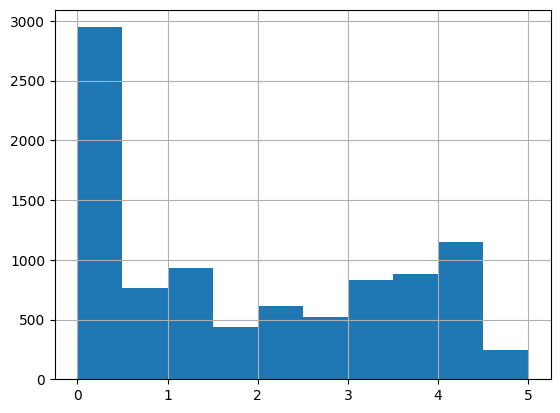

In [82]:
import matplotlib.pyplot as plt

train_pd['label'].hist()

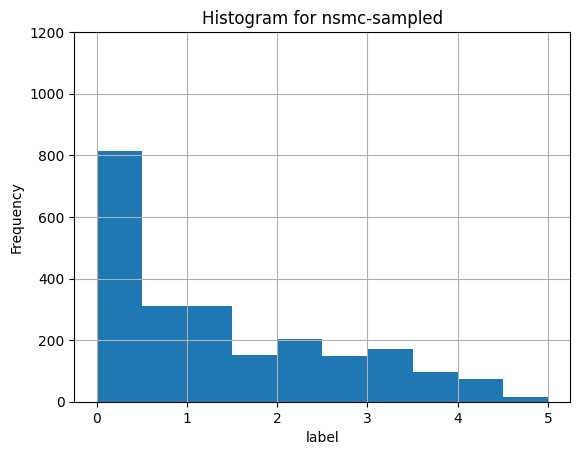

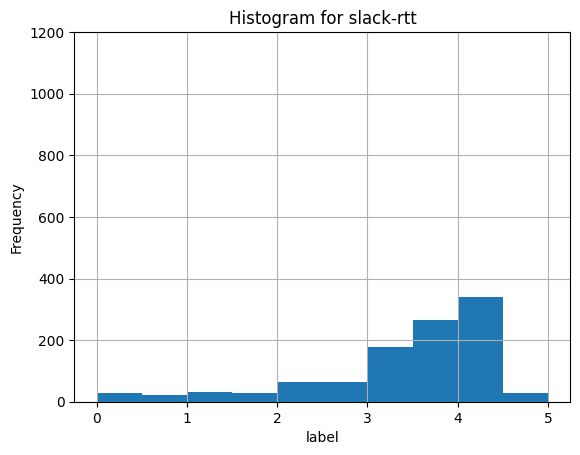

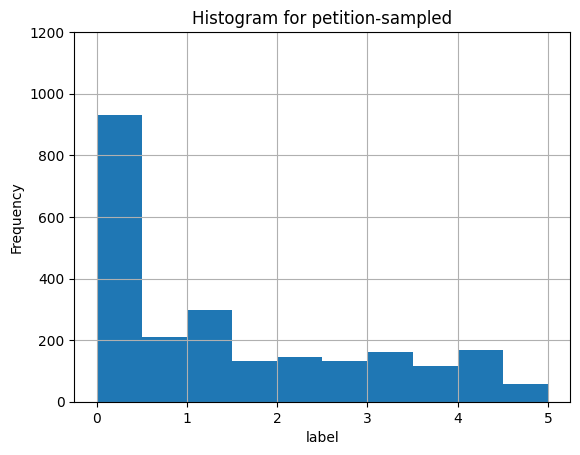

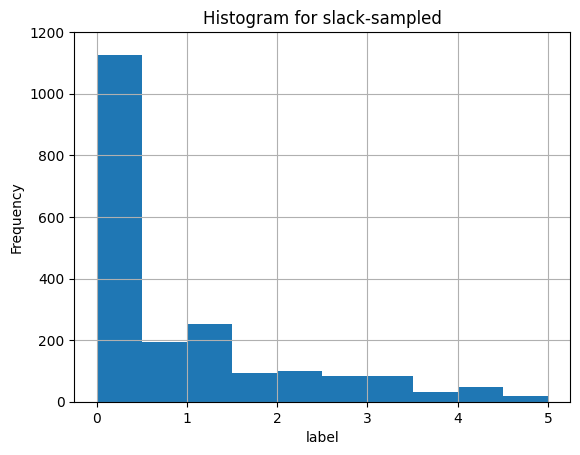

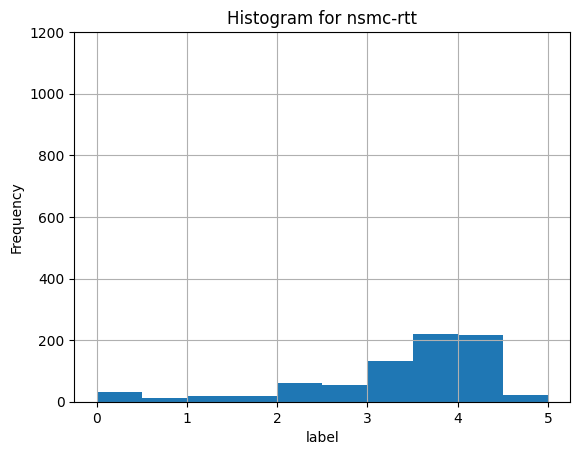

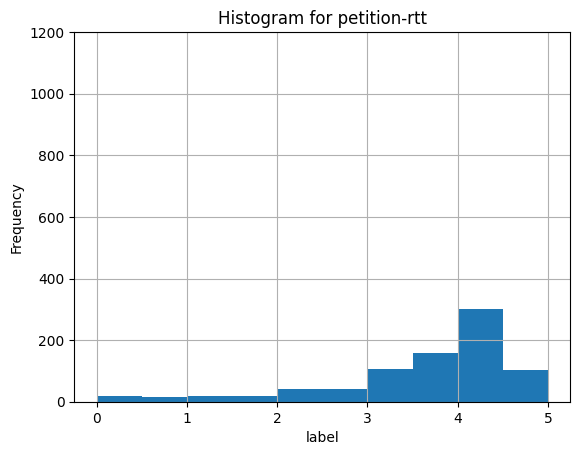

In [85]:
sources = train_pd['source'].unique()

for source in sources:
    subset = train_pd[train_pd['source'] == source]
    plt.figure()
    subset['label'].hist(bins=10)
    plt.ylim(0, 1200)
    plt.title(f'Histogram for {source}')
    plt.xlabel('label')
    plt.ylabel('Frequency')
    plt.show()

## 4. 분석결과

In [ ]:
'''

1. 데이터 증강
이유 : 
    문제: 데이터 불균형  0점 4점 1점 2점 3점 5점 순서
        (0점, 4점) : 전체의 50%
        (0점, 4점, 1점) : 전체의 70%
        (2점, 3점) : 전체의 29%  --> 1.5~3.4을 증강 , 2점 1000개, 3점 1000개개
        (5점) : 1% --> s1과 s2 스위칭으로는 한계가 있어 불가



'''